In [1]:
import seml
from matplotlib import pyplot as plt

/nfs/homedirs/zuegnerd/libraries/seml/seml/database.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results("seml_example", to_data_frame=True)

/nfs/homedirs/zuegnerd/libraries/seml/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results.head()

,_id,config.dataset,config.db_collection,config.hidden_sizes,config.learning_rate,config.max_epochs,config.overwrite,config.regularization_params.dropout,config.seed,result.test_acc,result.test_loss
0,1,small_dataset_1,seml_example,[16],0.00001,519,1,0.440696,49592375,0.738594,0.333637
1,2,small_dataset_1,seml_example,[16],0.00001,626,2,0.446743,912760071,0.714019,6.445487
2,3,small_dataset_1,seml_example,[16],0.00001,768,3,0.011091,946656409,0.268248,8.519550
3,4,small_dataset_1,seml_example,"[32, 16]",0.00001,519,4,0.440696,488101063,0.334359,9.716397
4,5,small_dataset_1,seml_example,"[32, 16]",0.00001,626,5,0.446743,682478206,0.248766,8.092757


In [4]:
# Pandas doesn't like lists as groupby keys.
results["config.hidden_sizes"] = results["config.hidden_sizes"].astype(str)

In [5]:
results.groupby(["config.dataset", "config.hidden_sizes"])["result.test_loss"].agg(
    "mean"
)

config.dataset   config.hidden_sizes
large_dataset_1  [64, 32]               6.082730
                 [64]                   6.708074
large_dataset_2  [64, 32]               4.429962
                 [64]                   5.904191
small_dataset_1  [16]                   5.063250
                 [32, 16]               5.105564
small_dataset_2  [16]                   6.231065
                 [32, 16]               4.949711
Name: result.test_loss, dtype: float64

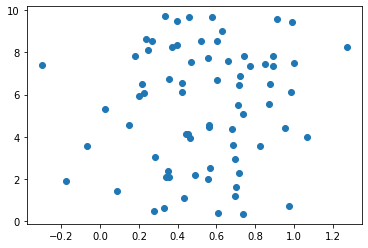

In [6]:
plt.scatter(results["result.test_acc"], results["result.test_loss"])
plt.show()